# **Match Song Lyrics to Artists**

In this assignment, you are asked to match song lyrics to their respective artists. Steps to the assignment:
1. Download the song lyrics. You can download the data from this link: https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/data
1. Preprocess your dataset to your liking. You are free to use any preprocessing with any libraries. Make sure to apply the preprocessing to the whole dataset, even the test part.
1. Split your dataset into train/dev/test sets with 0.70/0.15/0.15 proportions. Select a random state number and use it consistently to get the same sets while iterating. **This is very important!**
1. Select your features for the task: word n-grams (unigram, bigram, trigram), character n-grams, TF-IDF, and so on.
1. Use three different approaches to solve the task: Some examples are Naive Bayes, Logistic Regression, SVM, KNNs, and neural networks classification methods with the dataset. **You need to select Naive Bayes as one of the methods and code Naive Bayes with the MLE approach from scratch.**
1. Compare different classification methods and show confusion matrices for each method.
1. Write a small report on your approaches and results.


## Rules
### Allowed:
 - Use any libraries for preprocessing, feature selection, vector making, training, and predicting for the task, **other than the Naive Bayes classifier**.
 - Adding additional coding blocks
 - Use spaCy for Named Entity Recognition and Part-of-Speech tagging (next week's content but will be helpful for this assignment)

### Not allowed:
 - Using metadata in the dataset given. You must use **only** the lyrics of the song. For example, do not use the release year to assign authorship.
 - **You need to write your own Naive Bayes classifier.** Using the Naive Bayes classifier from an external library is not allowed.
 - Running your code with the test split of your data. You can run this just before you submit your system. We will run your system on your test data in the evaluation.
 - Changing the contents of the evaluation block at the end of the notebook.

## Assignment Report
Please write a short assignment report at the end of the notebook (max 500 words). Please include all of the following points in the report:
 - Preprocessing method
 - Selection of the features and the reasoning for the selections
 - Selection of the classification methods and the reasoning for the selection
 - Challenges you have faced while writing the tokenizer and challenges with the specific corpus
 - Limitations of your approach
 - Possible improvements to the system

## Grading
You will be graded with the following criteria:
 - running complete code (0.5),
 - clear commenting (0.5),
 - data loading and concatenation (0.5),
 - exploratory data analysis (EDA) - Artist Histogram Plot (0.5)
 - preprocessing function (0.5)
 - naive bayes implementation (1)
 - feature engineering (1)
 - model training and evaluation for at least 3 classification methods (including naive bayes) (1.5)
 - confusion matrix for each method (0.5)
 - assignment report (1).

Total points for this assignment = 7.5

You can get bonus points (maximum 0.5) by trying neural networks as one of the classifiers.

## Submission

Submission will be made to SUCourse. Please submit your file using the following naming convention.


`studentid_studentname_tokenizer.ipynb  - ex. 26744_aysegulrana_tokenizer.ipynb`


**Deadline is November 14nd, 23.55pm.**

### 1. Data Loading and Concatenation  (hint: use zipfile library for loading the zip file and concatenate the csv files)

Use pandas library to read your dataset into df object below.

In [1]:
#####
#Download the lyrics from the link into your folder and read it with zip file
#Assign the file contents into df object that is from pandas library.

import os
import pandas as pd

root_dir = 'Files/song_lyrics_data/csv/'
dataframes = {}

for filename in os.listdir(root_dir):
    if filename.endswith('.csv'):
        full_path = os.path.join(root_dir, filename)
        singer_name = filename[:-4]
        df_name = f"{singer_name}_df"
        
        # Read the CSV and assign it to the dictionary with key as the singer name
        dataframes[df_name] = pd.read_csv(full_path, sep=',')

In [2]:
# Check heads of dfs
for df_name, df in dataframes.items():
    print(df.head())

   Unnamed: 0    Artist                  Title             Album    Year  \
0           0  Dua Lipa              New Rules          Dua Lipa  2017.0   
1           1  Dua Lipa        Don’t Start Now  Future Nostalgia  2019.0   
2           2  Dua Lipa                  IDGAF          Dua Lipa  2017.0   
3           3  Dua Lipa  Blow Your Mind (Mwah)          Dua Lipa  2016.0   
4           4  Dua Lipa             Be the One          Dua Lipa  2015.0   

         Date                                              Lyric  
0  2017-06-02  one one one one one   talkin' in my sleep at n...  
1  2019-11-01  if you don't wanna see me   did a full 80 craz...  
2  2017-06-02  you call me all friendly tellin' me how much y...  
3  2016-08-26  i know it's hot i know we've got something tha...  
4  2015-10-30  i see the moon i see the moon i see the moon o...  
          Artist                   Title            Album        Date  \
0  Ariana Grande          ​thank u, next    thank u, next  2018-11-0

In [3]:
# Print lens of dfs
for df_name, df in dataframes.items():
    print(df_name, "has", len(df), "elements.")

DuaLipa_df has 247 elements.
ArianaGrande_df has 308 elements.
CharliePuth_df has 75 elements.
Drake_df has 466 elements.
BTS_df has 278 elements.
BillieEilish_df has 145 elements.
CardiB_df has 75 elements.
Eminem_df has 521 elements.
LadyGaga_df has 402 elements.
NickiMinaj_df has 323 elements.
Beyonce_df has 406 elements.
Maroon5_df has 197 elements.
EdSheeran_df has 296 elements.
JustinBieber_df has 348 elements.
TaylorSwift_df has 479 elements.
SelenaGomez_df has 175 elements.
ColdPlay_df has 344 elements.
Rihanna_df has 405 elements.
KatyPerry_df has 325 elements.
PostMalone_df has 148 elements.
Khalid_df has 64 elements.


### 2. Data Cleaning (Look at value count of each lyric and remove unnecessary or empty lyrics after this process view length of the dataframe to see the change)

In [4]:
# Loop over each df and drop the unnecessary columns
for df_name, df in dataframes.items():
    columns_to_drop = ["Title", "Album", "Year", "Date"]
    dataframes[df_name] = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [5]:
# Loop over each df and drop the column named 'Unnamed: 0'
for df_name, df in dataframes.items():
    unnamed_cols = [col for col in df.columns if "Unnamed" in col]
    if unnamed_cols:
        
        # Drop the 'Unnamed' columns found
        dataframes[df_name] = df.drop(columns=unnamed_cols)

In [6]:
for df_name, df in dataframes.items():
    print(df.head())

     Artist                                              Lyric
0  Dua Lipa  one one one one one   talkin' in my sleep at n...
1  Dua Lipa  if you don't wanna see me   did a full 80 craz...
2  Dua Lipa  you call me all friendly tellin' me how much y...
3  Dua Lipa  i know it's hot i know we've got something tha...
4  Dua Lipa  i see the moon i see the moon i see the moon o...
          Artist                                              Lyric
0  Ariana Grande  thought i'd end up with sean but he wasn't a m...
1  Ariana Grande  yeah breakfast at tiffany's and bottles of bub...
2  Ariana Grande  you you love it how i move you you love it how...
3  Ariana Grande  ariana grande  nicki minaj i've been here all ...
4  Ariana Grande  right now i'm in a state of mind i wanna be in...
         Artist                                              Lyric
0  Charlie Puth  woahoh hmhmm   you've been runnin' 'round runn...
1  Charlie Puth  charlie puth we don't talk anymore we don't ta...
2  Charlie Pu

In [7]:
for df_name, df in dataframes.items():
    print(df_name, "has", df.shape[0], "items before cleaning.")

DuaLipa_df has 247 items before cleaning.
ArianaGrande_df has 308 items before cleaning.
CharliePuth_df has 75 items before cleaning.
Drake_df has 466 items before cleaning.
BTS_df has 278 items before cleaning.
BillieEilish_df has 145 items before cleaning.
CardiB_df has 75 items before cleaning.
Eminem_df has 521 items before cleaning.
LadyGaga_df has 402 items before cleaning.
NickiMinaj_df has 323 items before cleaning.
Beyonce_df has 406 items before cleaning.
Maroon5_df has 197 items before cleaning.
EdSheeran_df has 296 items before cleaning.
JustinBieber_df has 348 items before cleaning.
TaylorSwift_df has 479 items before cleaning.
SelenaGomez_df has 175 items before cleaning.
ColdPlay_df has 344 items before cleaning.
Rihanna_df has 405 items before cleaning.
KatyPerry_df has 325 items before cleaning.
PostMalone_df has 148 items before cleaning.
Khalid_df has 64 items before cleaning.


In [8]:
# Check the ones with empty lyrics
for df_name, df in dataframes.items():
    
    # Find rows where 'Lyric' is NaN
    nan_rows = df[df['Lyric'].isna()]
    
    # Print content of these rows
    if not nan_rows.empty:
        print(f"NaN rows in DataFrame '{df_name}':")
        print(nan_rows)

NaN rows in DataFrame 'DuaLipa_df':
       Artist Lyric
155  Dua Lipa   NaN
NaN rows in DataFrame 'Drake_df':
    Artist Lyric
446  Drake   NaN
449  Drake   NaN
NaN rows in DataFrame 'BTS_df':
          Artist Lyric
202  BTS (방탄소년단)   NaN
219  BTS (방탄소년단)   NaN
227  BTS (방탄소년단)   NaN
228  BTS (방탄소년단)   NaN
236  BTS (방탄소년단)   NaN
242  BTS (방탄소년단)   NaN
248  BTS (방탄소년단)   NaN
254  BTS (방탄소년단)   NaN
NaN rows in DataFrame 'LadyGaga_df':
        Artist Lyric
70   Lady Gaga   NaN
82   Lady Gaga   NaN
94   Lady Gaga   NaN
148  Lady Gaga   NaN
180  Lady Gaga   NaN
220  Lady Gaga   NaN
363  Lady Gaga   NaN
NaN rows in DataFrame 'NickiMinaj_df':
          Artist Lyric
251  Nicki Minaj   NaN
306  Nicki Minaj   NaN
NaN rows in DataFrame 'EdSheeran_df':
         Artist Lyric
275  Ed Sheeran   NaN
290  Ed Sheeran   NaN
NaN rows in DataFrame 'JustinBieber_df':
            Artist Lyric
297  Justin Bieber   NaN
NaN rows in DataFrame 'TaylorSwift_df':
           Artist Lyric
140  Taylor Swift   NaN
395 

In [9]:
# Drop those with empty lyrics
for df_name, df in dataframes.items():
    dataframes[df_name] = df.dropna(subset=['Lyric'])

In [10]:
for df_name, df in dataframes.items():
    print(df_name, "has", df.shape[0], "items after cleaning.")

DuaLipa_df has 246 items after cleaning.
ArianaGrande_df has 308 items after cleaning.
CharliePuth_df has 75 items after cleaning.
Drake_df has 464 items after cleaning.
BTS_df has 270 items after cleaning.
BillieEilish_df has 145 items after cleaning.
CardiB_df has 75 items after cleaning.
Eminem_df has 521 items after cleaning.
LadyGaga_df has 395 items after cleaning.
NickiMinaj_df has 321 items after cleaning.
Beyonce_df has 406 items after cleaning.
Maroon5_df has 197 items after cleaning.
EdSheeran_df has 294 items after cleaning.
JustinBieber_df has 347 items after cleaning.
TaylorSwift_df has 477 items after cleaning.
SelenaGomez_df has 174 items after cleaning.
ColdPlay_df has 333 items after cleaning.
Rihanna_df has 397 items after cleaning.
KatyPerry_df has 324 items after cleaning.
PostMalone_df has 148 items after cleaning.
Khalid_df has 64 items after cleaning.


In [11]:
# For additional cleaning, I assume that a song lyrics should have at least a sentence
# An average sentence in english is about 15 words

# Loop through all dataframes
for df_name, df in dataframes.items():
    
    # Loop through the DataFrame to identify rows to drop
    rows_to_drop = []
    for index, row in df.iterrows():
        list_of_words = str(row['Lyric']).split(" ")
        
        # Add rows with less than 15 words to rows_to_drop 
        if len(list_of_words) < 15:
            print(df_name, index, row['Lyric'])
            rows_to_drop.append(index)

    # Drop identified rows
    df = df.drop(index=rows_to_drop)

    # Update the dictionary
    dataframes[df_name] = df

DuaLipa_df 71 unreleased
DuaLipa_df 99 unreleased
DuaLipa_df 100 unreleased
DuaLipa_df 125 unreleased
DuaLipa_df 130 lyrics from snippet guilty we could blame it on timing if that just
DuaLipa_df 152 unreleased
DuaLipa_df 181 unreleased
DuaLipa_df 182 unreleased
DuaLipa_df 216 the lyrics for this song have yet to be transcribed
DuaLipa_df 226 lyrics from snippet  throw away the key ooh i think i'm
DuaLipa_df 228 unleakedunreleased song
DuaLipa_df 231 lyrics for this song haven't released check back later when the lyrics release
ArianaGrande_df 148 lyrics will be available upon release stay tuned
ArianaGrande_df 168 tba
ArianaGrande_df 226 ariii  kim
ArianaGrande_df 242 released in 09
ArianaGrande_df 263 snippet  dont talk back feel the honesty
ArianaGrande_df 286 hei
ArianaGrande_df 290 know my love infinite nothing that i wont do
ArianaGrande_df 293 shhh baby before u get aroused
ArianaGrande_df 296 no lyrics to be found come back soon when there is some
ArianaGrande_df 299 love boy y

In [12]:
# Check number items again
for df_name, df in dataframes.items():
    print(df_name, "has", df.shape[0], "items after further cleaning.")

DuaLipa_df has 234 items after further cleaning.
ArianaGrande_df has 296 items after further cleaning.
CharliePuth_df has 75 items after further cleaning.
Drake_df has 457 items after further cleaning.
BTS_df has 266 items after further cleaning.
BillieEilish_df has 142 items after further cleaning.
CardiB_df has 73 items after further cleaning.
Eminem_df has 512 items after further cleaning.
LadyGaga_df has 380 items after further cleaning.
NickiMinaj_df has 309 items after further cleaning.
Beyonce_df has 402 items after further cleaning.
Maroon5_df has 197 items after further cleaning.
EdSheeran_df has 291 items after further cleaning.
JustinBieber_df has 344 items after further cleaning.
TaylorSwift_df has 475 items after further cleaning.
SelenaGomez_df has 167 items after further cleaning.
ColdPlay_df has 330 items after further cleaning.
Rihanna_df has 394 items after further cleaning.
KatyPerry_df has 317 items after further cleaning.
PostMalone_df has 148 items after further c

In [13]:
# Lastly, clean if Artist is null
for df_name, df in dataframes.items():
    
    # Drop rows where 'Artist' is NaN
    dataframes[df_name] = df.dropna(subset=['Artist'])

### 3. Exploratory Data Analysis (EDA) - Artist Histogram (Create a histogram for the number of lyrics of each artist using matplotlib)

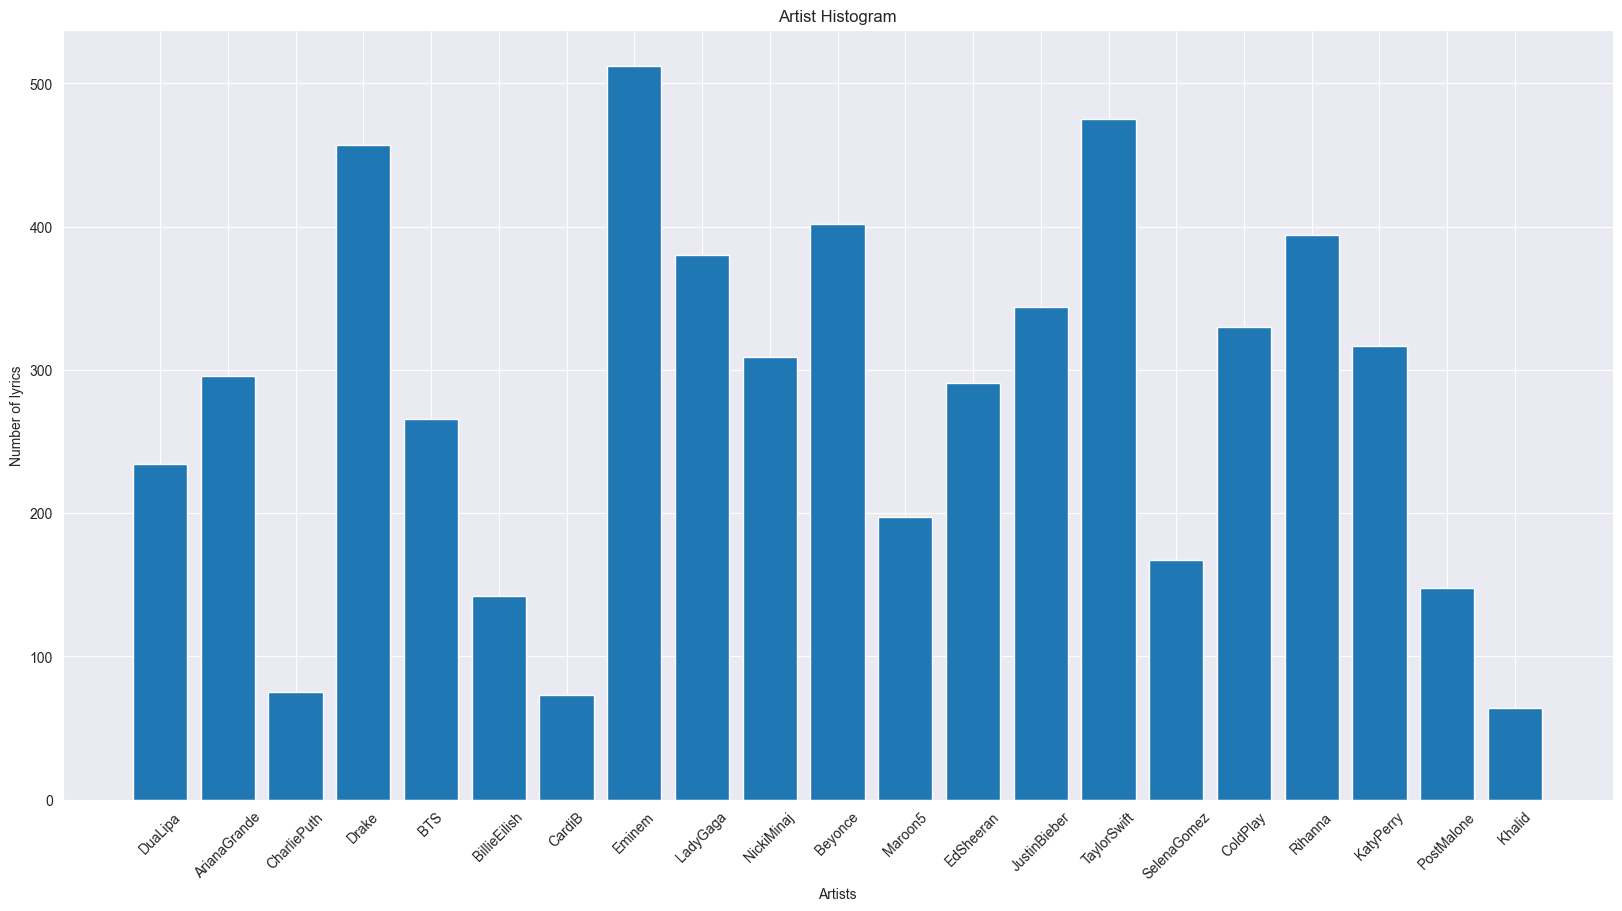

In [14]:
#### WRITE YOUR CODE HERE
import matplotlib.pyplot as plt

# Create a dictionary for artist = lyric number pairs
artist_lyrics = {}
for df_name, df in dataframes.items():
    
    # Drop the ".csv" from name and assign
    artist_lyrics[df_name[:-3]] = df.shape[0]
    
# Extract keys and values (keys = artist names, values = lyric count)
artists = list(artist_lyrics.keys())
values = list(artist_lyrics.values())
    
# Plot the bar chart
plt.figure(figsize=(20, 10))
plt.bar(artists, values)

# Add labels and title
plt.xlabel('Artists')
plt.ylabel('Number of lyrics')
plt.title('Artist Histogram')

# Display the plot
plt.xticks(rotation=45)
plt.show()

### 4. Preprocessing Function (Create a preprocess function for the lyrics)

In [81]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
                    
#### WRITE YOUR CODE HERE
def preprocess_data(data):
    stop_words_en = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    for index, row in data.iterrows():
        
        # Get the lyric
        text = row['Lyric']
        
        # Split the lyric into words
        sentence_words = word_tokenize(text)

        # Set a list for processed words
        lyric_words = []

        # Loop over words in lyric
        for word in sentence_words:
            
            # Remove other punctuation but keep apostrophes (apostrophes left intact as they give stylistic information)
            word = re.sub(r"[^\w\s']", '', word)
            
            # Check if the word contains only Latin characters now
            if re.match(r"^[a-zA-Z'’]+$", word):
                
                # Lowercase the word
                word = word.lower()
                
                # Remove stopwords
                if word not in stop_words_en:
                    
                    # Lemmatize word
                    word = lemmatizer.lemmatize(word)
                
                # Add the processed word to the list
                lyric_words.append(word)
                
            # If word is not in Latin
            else:
                
                # If it is not a word but a number, remove it
                if re.match(r'^\d+$', word):
                    continue
                
                # Append the word as it is
                lyric_words.append(word)

        # Join the processed words back into a single string
        data.at[index, 'Lyric'] = ' '.join(lyric_words)
        
    return data
        

# Apply the preprocessing function to the DataFrame

# Combine all dataframes
df = pd.concat(dataframes.values(), axis=0, ignore_index=True)

# Apply the preprocessing function
df = preprocess_data(df)

[nltk_data] Downloading package stopwords to /Users/sima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/sima/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### Train Dev Test split
Separate the song lyrics (documents) with respective artist names (labels). Split the dataset into train/dev/test datasets with 0.70/0.15/0.15 proportions.

In [82]:
#### WRITE YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Set lyric (document) as feature and artist as target
X = df['Lyric']
y = df['Artist']

# Initial split (0.7 train - 0.3 remaining)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split dev and test into 0.15 - 0.15
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### 5. Implement a Naive Bayes classifier with Bag-of-Words features **from** scratch. You are not allowed to use external libraries for training a NB classifier.

In [83]:
#### WRITE YOUR NAIVE BAYES CODE HERE
import math

# P(Artist | Lyric) = (P(Lyric | Artist) * P(Artist)) / P(Lyric)
# However, as we have a lyric, we will calculate each word's possibility of belonging to such artist
# As we will calculate in log space, we will sum those values
# Lastly, P(Lyric) is same for all classes, therefore, we ignore it

# The model takes both train and test data, uses train data to gather statistics and test data to make make predictions.
# It returns a list of predictions

def naive_bayes_classifier(train_data, test_data):
    
    # Dictionary for probabilities
    log_probs = {}
    
    # Dictionary of words for Laplace smoothing
    unique_words = {}
    
    # Dictionary for artist / word data
    artists_word_data = {}
    
    # Total word count
    total_words = 0
    
    # Dict for possibilities of seeing an artist
    artist_counts = {}
    
    # Loop over each row in the data to collect artist and word data
    for index, row in train_data.iterrows():
        
        # Initialize artist in artist_word_data dictionary
        if row['Artist'] not in artists_word_data:
            artists_word_data[row['Artist']] = {"total_word_count": 0,
                                                "unique_words": {}}
        
        # Count occurrences of each artist
        if row['Artist'] in artist_counts:
            artist_counts[row['Artist']] += 1
        else:
            artist_counts[row['Artist']] = 1
            
        # Check number of unique words
        lyric_words = row['Lyric'].split()
        
        # Loop over words
        for word in lyric_words:
            
            # Add word into total unique words
            if word in unique_words:
                unique_words[word] += 1
            else:
                unique_words[word] = 1
                
            # Add word to the unique words of the artist
            if word not in artists_word_data[row['Artist']]["unique_words"]:
                artists_word_data[row['Artist']]["unique_words"][word] = 1
            else:
                artists_word_data[row['Artist']]["unique_words"][word] += 1
              
        # Increase total count for artist        
        artists_word_data[row['Artist']]['total_word_count'] += len(lyric_words)
                
        # Increase total word count in general
        total_words += len(lyric_words)
        
    # Calculate artist probabilities
    total_artists = len(train_data)
    
    # Set artist probability
    artist_probabilities = {artist: occurance / total_artists for artist, occurance in artist_counts.items()}
    
    # Calculate value for smoothing
    V = len(unique_words)

    # List to store predictions
    predictions = []

    # Loop over each row in the test data for prediction
    for index, row in test_data.iterrows():
        sentence = row['Lyric']
    
        # Split the input sentence into words
        input_words = sentence.split()
    
        # For each artist, compute the log probability
        for artist in artists_word_data.keys():
            
            # Set probability for artist
            p_lyric_given_artist = 0
            
            # Probability of coming across artist
            p_artist = artist_probabilities.get(artist, 0)
    
            # Add log probability of p_artist to p_lyric given artist
            p_lyric_given_artist += math.log(p_artist)
    
            # For each word in the input sentence
            for word in input_words:
                
                # Get the count of the word in the artist's lyrics
                word_count = artists_word_data[artist]['unique_words'].get(word, 0)
    
                # Apply Laplace smoothing to calculate word given artist
                p_word_given_artist = (word_count + 1) / (artists_word_data[artist]['total_word_count'] + V)
    
                # Add the log probability to the cumulative log probability for the artist
                p_lyric_given_artist += math.log(p_word_given_artist)
    
            # Store the cumulative log probability for the artist
            log_probs[artist] = p_lyric_given_artist
    
        # Predict the artist with the highest log probability
        predicted_artist = max(log_probs, key=log_probs.get)
        
        # Append the predicted artist to the predictions list
        predictions.append(predicted_artist)
    
    # Return the list of predictions
    return predictions

### 6. Feature Selection and Engineering for other two classification methods - Select your features and convert your data with respect to these features. For example, if you will use numerical representation, use appropriate methods to transform your data to vectors.

In [128]:
### TF-IDF and Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer

# Setting bigrams
# Ignoring words that appear more than 80% of the documents
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.8)

# Transform the lyrics to numerical representations
X_train_tfidf = vectorizer.fit_transform(X_train)
X_dev_tfidf = vectorizer.transform(X_dev)
X_test_tfidf = vectorizer.transform(X_test)

### Doc2Vec - KNN
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tag each document (each song lyric) for training
tagged_data = [TaggedDocument(words=lyric.split(), tags=[str(i)]) for i, lyric in enumerate(X_train)]

# Train a Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=10, min_count=2, workers=4, epochs=20)

# Transform train, development, and test sets to vectors
X_train_d2v = [doc2vec_model.infer_vector(lyric.split()) for lyric in X_train]
X_dev_d2v = [doc2vec_model.infer_vector(lyric.split()) for lyric in X_dev]
X_test_d2v = [doc2vec_model.infer_vector(lyric.split()) for lyric in X_test]

### 7. Model Training and Evaluation
#### - Use several models to train on the dataset
#### - Use development dataset to see your system performances and optimize your system as you want.
#### - Lastly, evaluate your results with accuracy and F1 scores using test set.
#### - Report on the performance on the test set with comparison between methods and confusion matrices.

Logistic Regression | TF-IDF - Development Accuracy: 0.6061293984108967
Logistic Regression | TF-IDF - Development F1 Score: 0.601701215859641
Logistic Regression | TF-IDF - Test Accuracy: 0.64472190692395
Logistic Regression | TF-IDF - Test F1 Score: 0.637776035261629
Logistic Regression | TF-IDF - Confusion Matrix:
 [[30  1  0  0  0  0  0  0  0  0  0  3  2  0  1  0  0  0  3  0  6]
 [ 0 34  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0 45  0  0  0  3  3  0  1  0  0  1  0  0  0  0  0  2  0 11]
 [ 0  0  0  9  0  0  0  2  0  1  1  0  0  0  1  0  0  0  0  0  3]
 [ 1  0  0  0  0  0  0  4  0  0  5  0  0  0  0  0  3  0  0  0  1]
 [ 0  0  1  0  0  1  0  4  0  0  0  1  0  0  0  0  0  0  2  0  6]
 [ 0  1  0  0  0  0 24  0  0  0  1  2  0  0  1  0  0  0  0  0 12]
 [ 0  0  1  0  0  0  0 60  0  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0  0  3  0  0  0  0  0 19  1  0  1  3  0  1  0  0  0  3  0 10]
 [ 0  0  0  0  0  0  0  0  0 23  1  0  1  0  1  0  0  0  2  0 14]
 [ 0  0  0  0  0  0 

/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/p

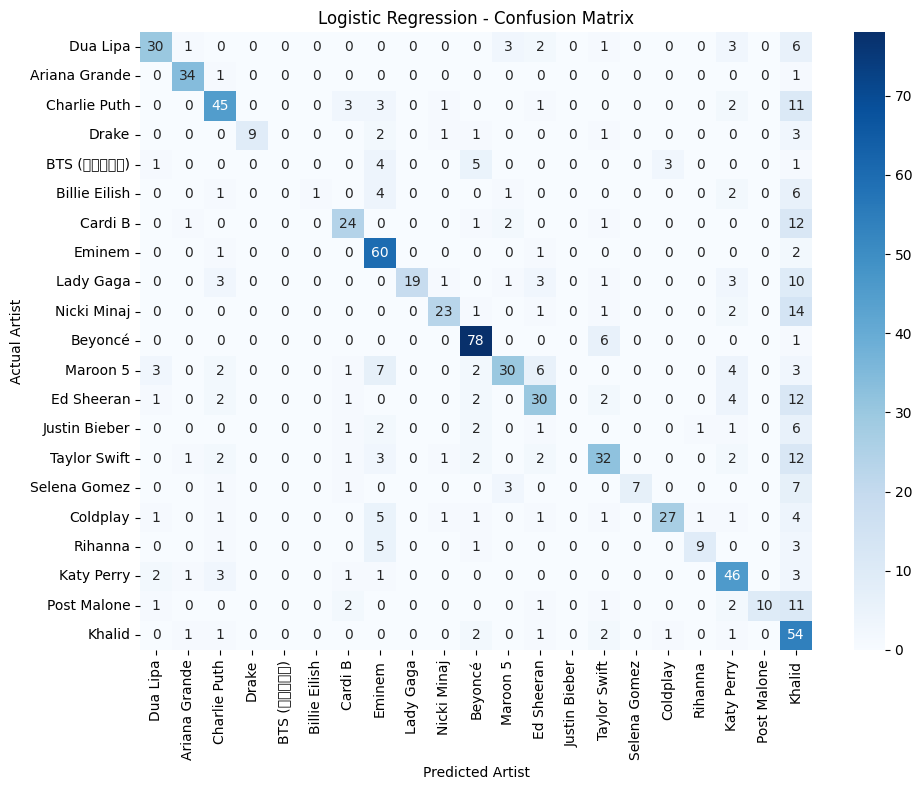

<Figure size 640x480 with 0 Axes>

In [136]:
#### WRITE YOUR CODE HERE

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train logistic regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Development set evaluation
y_dev_pred_lr = lr_model.predict(X_dev_tfidf)
dev_accuracy_lr = accuracy_score(y_dev, y_dev_pred_lr)
dev_f1_score_lr = f1_score(y_dev, y_dev_pred_lr, average='weighted')

print("Logistic Regression | TF-IDF - Development Accuracy:", dev_accuracy_lr)
print("Logistic Regression | TF-IDF - Development F1 Score:", dev_f1_score_lr)

# Test set evaluation
y_test_pred_lr = lr_model.predict(X_test_tfidf)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_f1_score_lr = f1_score(y_test, y_test_pred_lr, average='weighted')
test_cm_lr = confusion_matrix(y_test, y_test_pred_lr)

print("Logistic Regression | TF-IDF - Test Accuracy:", test_accuracy_lr)
print("Logistic Regression | TF-IDF - Test F1 Score:", test_f1_score_lr)
print("Logistic Regression | TF-IDF - Confusion Matrix:\n", test_cm_lr)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(10, 8))
class_names = y.unique()
sns.heatmap(test_cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Artist')
plt.ylabel('Actual Artist')
plt.title('Logistic Regression - Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clear the plot to prevent overlap with future plots
plt.clf()

KNN | Doc2Vec - Development Accuracy: 0.42224744608399545
KNN | Doc2Vec - Development F1 Score: 0.42157320046202706
KNN | Doc2Vec - Test Accuracy: 0.4301929625425653
KNN | Doc2Vec - Test F1 Score: 0.429751959460764
KNN | Doc2Vec - Confusion Matrix:
 [[26  2  3  2  0  0  3  3  1  0  0  0  1  0  1  0  0  0  0  1  3]
 [ 3 28  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 8  2 33  6  0  0  3  1  2  1  1  0  4  0  0  0  2  0  2  0  1]
 [ 0  2  2 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 1  0  0  1  3  1  0  3  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 3  0  1  0  0  2  3  1  0  3  0  0  0  0  0  0  0  0  2  0  0]
 [ 6  3  6  3  0  0 19  0  0  0  2  0  0  0  0  0  0  0  1  1  0]
 [10  1  6  2  2  0  3 29  0  0  1  0  1  0  0  0  6  0  3  0  0]
 [ 3  4  2  1  0  0  5  0 19  1  0  0  1  0  1  1  0  0  0  0  3]
 [ 6  1  1  0  0  0 11  2  1 15  2  0  0  0  0  0  1  0  1  0  1]
 [ 1  3  7  3  0  0  2  2  0  0 61  0  1  0  1  0  1  0  3  0  0]
 [ 9  1  7  3  0  1  3  

/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Figure size 640x480 with 0 Axes>

/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL

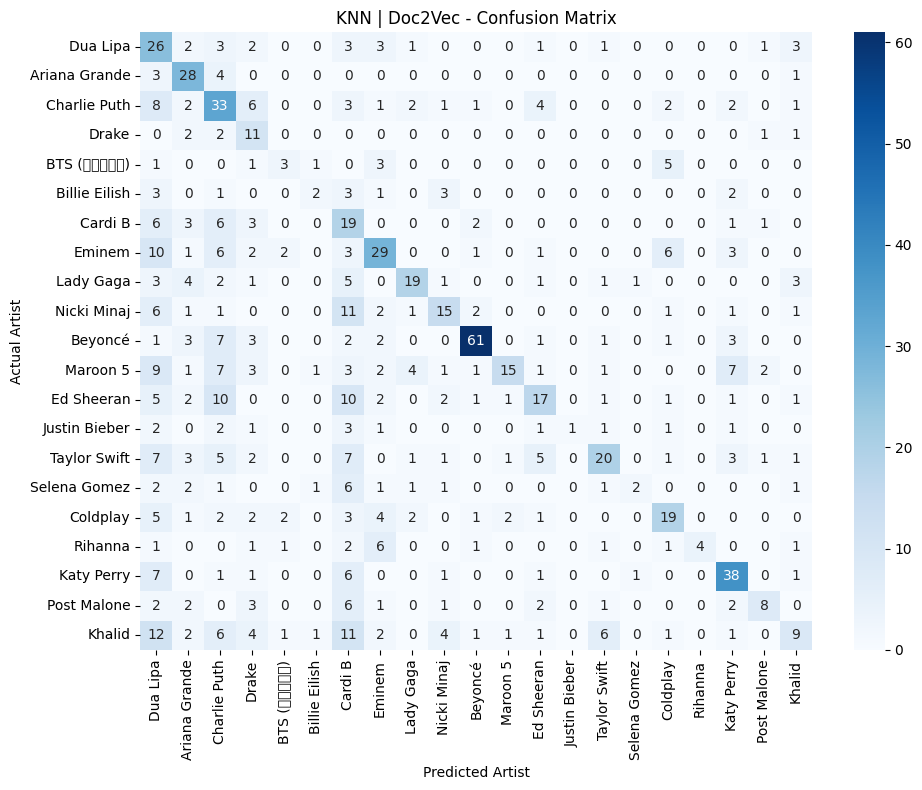

AttributeError: module 'matplotlib.pyplot' has no attribute 'clr'

In [137]:
#### WRITE YOUR CODE HERE

# Clean the previous plot
plt.clf()

# KNN

# Import the necessary libraries
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_d2v, y_train)

# Development set evaluation
y_dev_pred_knn = knn_model.predict(X_dev_d2v)
dev_accuracy_knn = accuracy_score(y_dev, y_dev_pred_knn)
dev_f1_score_knn = f1_score(y_dev, y_dev_pred_knn, average='weighted')

print("KNN | Doc2Vec - Development Accuracy:", dev_accuracy_knn)
print("KNN | Doc2Vec - Development F1 Score:", dev_f1_score_knn)

# Test set evaluation
y_test_pred_knn = knn_model.predict(X_test_d2v)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_f1_score_knn = f1_score(y_test, y_test_pred_knn, average='weighted')
test_cm_knn = confusion_matrix(y_test, y_test_pred_knn)

print("KNN | Doc2Vec - Test Accuracy:", test_accuracy_knn)
print("KNN | Doc2Vec - Test F1 Score:", test_f1_score_knn)
print("KNN | Doc2Vec - Confusion Matrix:\n", test_cm_knn)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
class_names = y.unique()
sns.heatmap(test_cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Artist')
plt.ylabel('Actual Artist')
plt.title('KNN | Doc2Vec - Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.clf()

Naive Bayes - Test Accuracy: 0.5675368898978433
Naive Bayes - Test F1 Score: 0.5562958707167562
Naive Bayes - Confusion Matrix:
 [[23  0  3  0  0  0  0  2  0  0  0  4  0  0  0  0  1  0  6  0  7]
 [ 0 32  1  1  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0 40  0  0  0  0  5  0  0  3  0  0  0  1  0  1  0  6  0 10]
 [ 0  0  0  4  0  0  0  4  0  1  3  0  0  1  0  0  0  0  0  0  4]
 [ 0  0  1  0  1  0  0  5  0  0  3  0  0  0  0  0  3  0  1  0  0]
 [ 0  0  2  0  0  0  0  4  0  0  1  0  0  0  0  0  0  0  2  0  6]
 [ 0  0  0  0  0  0 14  3  0  3  2  2  0  0  0  0  0  0  1  0 16]
 [ 0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 1  0  2  0  0  0  0  3 14  1  3  1  0  0  0  0  0  0  4  0 12]
 [ 0  0  2  0  0  0  0  2  0 17  5  0  0  0  0  0  0  0  1  0 15]
 [ 0  0  0  1  0  1  0  1  0  1 78  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  2 31  0  0  0  0  0  0  4  0 12]
 [ 0  0  4  0  0  0  0 10  0  0  5  0 19  0  0  0  0  0  1  0 15]
 [ 0  0  0  0

/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Figure size 640x480 with 0 Axes>

/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sima/Desktop/cs445_hw2/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL

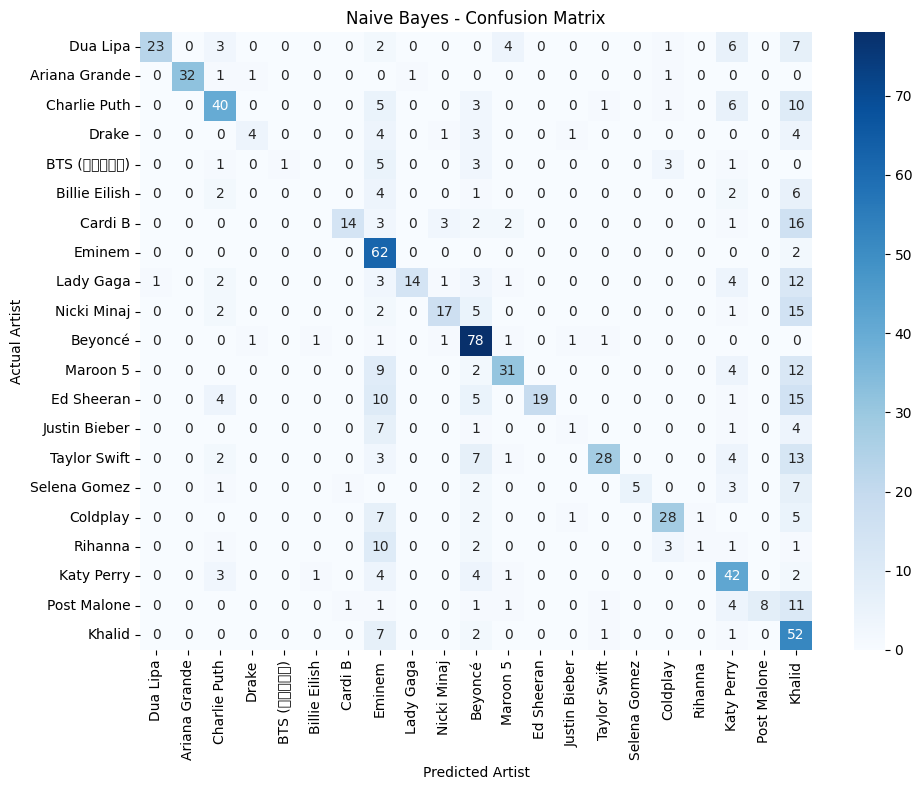

In [138]:
#### WRITE YOUR CODE HERE

plt.clf()
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Create DataFrame for training data
data_train = pd.DataFrame({'Lyric': X_train, 'Artist': y_train})

# Create DataFrame for testing data
data_test = pd.DataFrame({'Lyric': X_test, 'Artist': y_test})

# Make predictions using Naive Bayes classifier
y_test_pred = naive_bayes_classifier(data_train, data_test)

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted')
cm = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics
print("Naive Bayes - Test Accuracy:", accuracy)
print("Naive Bayes - Test F1 Score:", f1)
print("Naive Bayes - Confusion Matrix:\n", cm)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
class_names = y.unique()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Artist')
plt.ylabel('Actual Artist')
plt.title('Naive Bayes - Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Report

## Preprocessing Function
Preprocessed using NLTK: removed punctuation except for apostrophes as I thought it gives stylistic information about the artist. Then I tokenized, filtered out non-Latin words and numbers, lowercased, removed stopwords, and lemmatized the rest.
##
## Naive Bayes Classifier
I used math as I have to use log probabilities for not to overload.
My Naive Bayes Classifier takes both train and test data, uses train data to gather prior statistics and uses test data to make predictions, it returns a predictions list.

It goes over train data and collects prior probabilities.
It collects:
- Probability of coming across each artist
- Total word count in general and for each artist
- Unique words in total and unique word for each artist

Then, it uses number of unique words to calculate V value for laplace smoothing

After that, it loops over the test data, for each artist:
- Calculates coming across such artist
- Calculates each word’s prob. of belonging to the artist and adds it (as we are in the log space)
- Adds calculated probability to a list

Lastly, it selects the artist with the highest prob. as prediction and returns predictions.
##
## Feature Selection and Engineering
I decided to use Logistic Regression with TF-IDF and KNN with Doc2Vec.

The reason I used TF-IDF with LR is TF-IDF is good at capturing the importance of words in each document (lyrics in this case) and it works well with Logistic Regression. 

The reason I selected Doc2Vec was i am somewhat familiar with _2Vec models and they are somewhat good at capturing context (style, meaning) of the entire document and in theory, whole lyric may give a better idea about the artist than each word. As KNN relies on similarity, this could be a good match I thought.

So, I used TfidfVectorizer from sklearn, I played with different metrics such as ngram_range, max_df, min_df and settled with no min_df, max_df = 0.8 and ngram_range of 1,2, using bigrams.

For doc2vec, I set vector_size to 100 to balance performance and efficiency. I set the window to 10 as I thought capturing more context for each word is better. I set the min_count for 2.
##
## Model Training and Evaluation
I trained my models and run them.

Logistic regression had an F1 score of 0.637776035261629

When we inspect its confusion matrix, we see that the model was good in capturing some artists like Beyonce and Coldplay while it assigned Khalid incorrectly to many artists. And BTS was never predicted for some reason. 
I assume the reason for it not getting Khalid could be because Khalid had a a small sample set.

Doc2Vec with KNN, F1 score was 0.429751959460764

Things are a little bit different for Doc2Vec. Though it is also good at predicting Beyonce and Coldplay, it did not falsely predicted Khalid but it also could not identify him correctly too. However, it has falsely predicting issue for Cardi B.

Lastly, Naive Bayes had an F1 score of 0.5562958707167562.

It performed similar to Logistic regression in terms of Khalid. We can see the similar pattern. This can be because both work with words rather than capturing the whole documents.

In the end, for both LR and Naive Bayes, we can say that class imbalance may have affected them. The similarity can be explain with both models assuming words are independent from each other. This may not have occured in KNN as it works with neighbors but Khalid did not have many neighbors because it being not that common.

Also, for all there, there were a problem with BTS, therefore my processing methods may not be suitable for non-Latin lyrics.
##
## Challenges and Possible Improvements
As mentioned, there is a class imbalance. We can use different methods to tackle this like oversampling and undersampling or assigning values to classes, and make it less problematic.
In addition, my preprocessing does not handle non-Latin characters/words well, it keeps them as they are. I thought this would not be a problem because a Korean character will obviously and correctly point out to a Korean artist but it did not work as I hoped. This could be inspected more and we can try more non-Latin languages.
Ensemble models can also be used to utilize both TF-IDF and Doc2Vec, giving a richer context.